# <h1 style="text-align: center;"><span style="color:#33ff33;">MongoDB Notebook</span></h1>

# Importation

In [1]:

import csv
from pymongo import MongoClient
import matplotlib.pyplot as plt




# Operations sur le ficher source du données

importation du fichier CSV et conversion de son contenu en listes python

In [2]:

with open(r'C:\Users\saifm\notebookproject\WB.csv', encoding='utf-8-sig') as dataFile:
    reader = csv.reader(dataFile)
    data = []
    for row in reader:
        data.append(row)

    # pour supprimer la 1ere ligne qui contient les titres
    data.pop(0)
    print(data)
    
    

[['2010', 'Africa', '8436193.56', '0', '8436193.56'], ['2010', 'Angola', '19767855.19', '5763290.04', '14004565.15'], ['2010', 'Botswana', '2377000.89', '0', '2377000.89'], ['2010', 'Botswana', '0', '477444.22', '-477444.22'], ['2010', 'Burundi', '88240174.47', '6569.85', '88233604.62'], ['2010', 'Comoros', '2327916.53', '3246186.43', '-918269.9'], ['2010', 'Congo, Democratic Republic of', '332297347.3', '6850260.25', '325447087'], ['2010', 'Eritrea', '4656953.32', '4806069.58', '-149116.26'], ['2010', 'Eswatini', '0', '6342279.62', '-6342279.62'], ['2010', 'Eswatini', '0', '250374.36', '-250374.36'], ['2010', 'Ethiopia', '714622860.7', '3785436.42', '710837424.3'], ['2010', 'Kenya', '218111675.5', '87025017.98', '131086657.5'], ['2010', 'Lesotho', '0', '725206.74', '-725206.74'], ['2010', 'Lesotho', '13487977.69', '7027604.66', '6460373.03'], ['2010', 'Madagascar', '28730224.05', '1074526.87', '27655697.18'], ['2010', 'Malawi', '131925060.1', '73621.74', '131851438.4'], ['2010', 'Maur

# Filtration

Filtration du contenu de fichier et leur division en 3 categories: Best , Faithful et Nonfaithful

In [3]:

faithfulList = []
nonfaithfulList = []
BestList=[]

for element in data:
    if float(element[4]) <1000000 and float(element[4]) >=0:
        faithfulList.append({'year': element[0],
                             'country': element[1],
                             'debt': element[4],
                             'faithful': 'true'
                               })
    else:
        if float(element[4]) < 0:
            BestList.append({'year': element[0],
                             'country': element[1],
                             'debt': element[4],
                             'faithful': 'true'
                               })
        else:
            nonfaithfulList.append({'year': element[0],
                                 'country': element[1],
                                 'debt': element[4],
                                   })

print(faithfulList)




[{'year': '2010', 'country': 'Mozambique', 'debt': '0', 'faithful': 'true'}, {'year': '2010', 'country': 'St. Lucia', 'debt': '407681.17', 'faithful': 'true'}, {'year': '2010', 'country': 'St. Vincent and the Grenadines', 'debt': '693903.56', 'faithful': 'true'}, {'year': '2011', 'country': 'Africa', 'debt': '482138.07', 'faithful': 'true'}, {'year': '2011', 'country': 'Mozambique', 'debt': '0', 'faithful': 'true'}, {'year': '2011', 'country': 'Namibia', 'debt': '90402.7', 'faithful': 'true'}, {'year': '2011', 'country': 'Sao Tome and Principe', 'debt': '354810.4', 'faithful': 'true'}, {'year': '2011', 'country': 'Kiribati', 'debt': '0', 'faithful': 'true'}, {'year': '2011', 'country': 'Samoa', 'debt': '814102.86', 'faithful': 'true'}, {'year': '2011', 'country': 'Dominica', 'debt': '188092.82', 'faithful': 'true'}, {'year': '2011', 'country': 'Guyana', 'debt': '284842.24', 'faithful': 'true'}, {'year': '2011', 'country': 'St. Vincent and the Grenadines', 'debt': '465383.17', 'faithful

# Connexion avec MongoDB , Initialisation , Execution

Connexion avec MongoDB et préparation des collections : Best , Faithful et Nonfaithful

In [4]:

client = MongoClient('mongodb://localhost:27017')

client.list_database_names()

DATABASE_NAME = 'WB_clients'
db = client[DATABASE_NAME]

best = db['best']
faithful = db['faithful']
nonfaithful = db['nonfaithful']

best.delete_many({})
faithful.delete_many({})
nonfaithful.delete_many({})

best.insert_many(BestList)
faithful.insert_many(faithfulList)
nonfaithful.insert_many(nonfaithfulList)



# Suppression du Africa

In [5]:

faithful.delete_many({"country": "Africa"})
nonfaithful.delete_many({"country": "Africa"})
best.delete_many({"country": "Africa"})



# Aggregation :

selection des documents de la collection nonfaithful en 2021

In [6]:

# Nonfaithful in 2021:
aggregation = [
    {
        '$match': {'year': '2021'},
    },
]
db.command('aggregate', 'nonfaithful', pipeline=aggregation, explain=False)



{'cursor': {'firstBatch': [{'_id': ObjectId('639650223455804d4c41ca17'),
    'year': '2021',
    'country': 'Albania',
    'debt': '135843559.7'},
   {'_id': ObjectId('639650223455804d4c41ca18'),
    'year': '2021',
    'country': 'Angola',
    'debt': '135176984.8'},
   {'_id': ObjectId('639650223455804d4c41ca19'),
    'year': '2021',
    'country': 'Argentina',
    'debt': '438441572.1'},
   {'_id': ObjectId('639650223455804d4c41ca1a'),
    'year': '2021',
    'country': 'Armenia',
    'debt': '23002822.73'},
   {'_id': ObjectId('639650223455804d4c41ca1b'),
    'year': '2021',
    'country': 'Barbados',
    'debt': '98571072.78'},
   {'_id': ObjectId('639650223455804d4c41ca1c'),
    'year': '2021',
    'country': 'Belarus',
    'debt': '31762041.16'},
   {'_id': ObjectId('639650223455804d4c41ca1d'),
    'year': '2021',
    'country': 'Belize',
    'debt': '17849754.42'},
   {'_id': ObjectId('639650223455804d4c41ca1e'),
    'year': '2021',
    'country': 'Bolivia',
    'debt': '336096

# Affichage du contenu de la collection Nonfaithful

In [7]:

cursor = nonfaithful.find()
for element in cursor:
    print(element)
    
    

{'_id': ObjectId('639650223455804d4c41c510'), 'year': '2010', 'country': 'Angola', 'debt': '14004565.15'}
{'_id': ObjectId('639650223455804d4c41c511'), 'year': '2010', 'country': 'Botswana', 'debt': '2377000.89'}
{'_id': ObjectId('639650223455804d4c41c512'), 'year': '2010', 'country': 'Burundi', 'debt': '88233604.62'}
{'_id': ObjectId('639650223455804d4c41c513'), 'year': '2010', 'country': 'Congo, Democratic Republic of', 'debt': '325447087'}
{'_id': ObjectId('639650223455804d4c41c514'), 'year': '2010', 'country': 'Ethiopia', 'debt': '710837424.3'}
{'_id': ObjectId('639650223455804d4c41c515'), 'year': '2010', 'country': 'Kenya', 'debt': '131086657.5'}
{'_id': ObjectId('639650223455804d4c41c516'), 'year': '2010', 'country': 'Lesotho', 'debt': '6460373.03'}
{'_id': ObjectId('639650223455804d4c41c517'), 'year': '2010', 'country': 'Madagascar', 'debt': '27655697.18'}
{'_id': ObjectId('639650223455804d4c41c518'), 'year': '2010', 'country': 'Malawi', 'debt': '131851438.4'}
{'_id': ObjectId('

# Aggregation:

Fonction python qui execute une commande d'aggregation de mongodb pour trouver le totale des dettes de Faithful , Nonfaithful ou Best au cours d'une année donnée

In [8]:

def get_debt_by_year(collection, year):
    aggregation_expression = [
        {
            '$match': {'year': str(year)},
        },
        {
            "$group": {"_id": "null", "somme": {"$sum": {"$toDouble": "$debt"}}}
        },
    ]

    ppl = db.command('aggregate', collection, pipeline=aggregation_expression, explain=False)
    # print("resultat d'aggregation \n", ppl, end='\n\n')
    try:
        # print(f"{collection} in {year}:")
        return ppl['cursor']['firstBatch'][0]['somme']
    except:
        return 0


print("WB best debt : ",get_debt_by_year('best', 2015))
print("WB faithful debt : ",get_debt_by_year('faithful', 2015))
print("WB nonfaithful debt : ",get_debt_by_year('nonfaithful', 2015))



WB best debt :  -2224789066.27
WB faithful debt :  1924845.3499999999
WB nonfaithful debt :  21013173087.81


# Utilisation des Graphes

In [10]:

years = []
best_by_year = []
faithful_by_year = []
nonfaithful_by_year = []

for x in range(2010, 2023):
    years.append(x)
    best_by_year.append(get_debt_by_year('best', str(x)))
    faithful_by_year.append(get_debt_by_year('faithful', str(x)))
    nonfaithful_by_year.append(get_debt_by_year('nonfaithful', str(x)))
    
print(best_by_year)
print(faithful_by_year)
print(nonfaithful_by_year)
print(years)



[-2727486407.06, -3470966164.16, -3925132316.62, -3695942092.94, -2519680085.2, -2224789066.27, -3049850659.0699997, -3084110001.73, -5147739278.41, -4357820610.79, -3582864208.68, -3693759170.92, -4399512757.45]
[1101584.73, 2533890.9, 3349122.51, 3132400.2, 1708380.42, 1924845.3499999999, 1655342.8199999998, 4928764.24, 1914315.62, 544682.65, 3589242.77, 1293941.47, 752367.64]
[29059880431.579998, 19229603424.61, 18599871134.02, 17605860911.66, 21313546443.78, 21013173087.81, 25021337841.16, 19927314029.3, 20046457723.12, 26642120045.99, 29284342142.11, 33741254023.84, 33789319653.170002]
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


# Visualisation des dettes des Best par an

<BarContainer object of 13 artists>

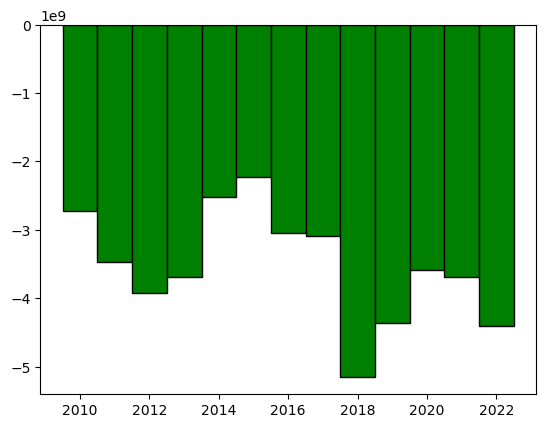

In [11]:
plt.bar(years, best_by_year, width=1, color='green', ec='black')

# Visualisation des dettes des Faithful par an

<BarContainer object of 13 artists>

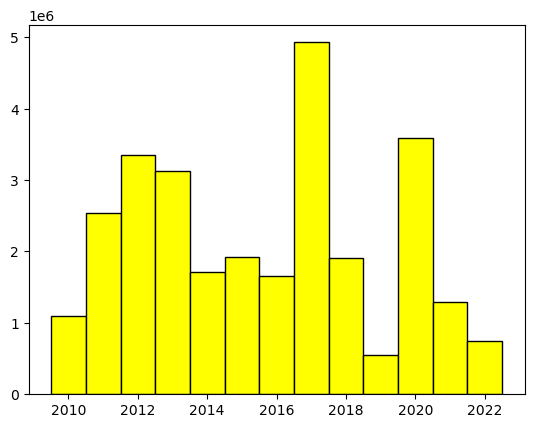

In [12]:
plt.bar(years, faithful_by_year, width=1, color='yellow', ec='black')

# Visualisation des dettes des Nonfaithful par an

<BarContainer object of 13 artists>

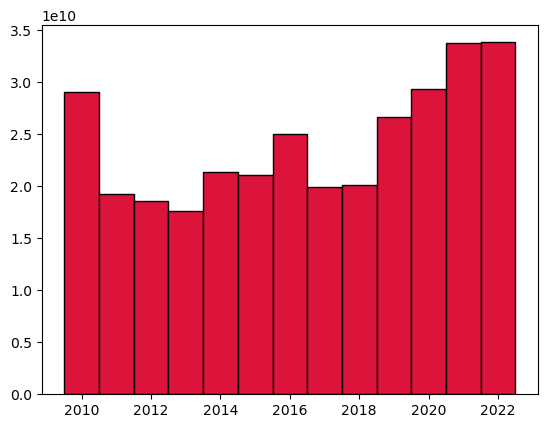

In [13]:
plt.bar(years, nonfaithful_by_year, width=1, color='crimson', ec='black')

# <h1 style="text-align: center;"><span style="color:#33ff33;">Merci pour votre Attention</span></h1>